# Investments-Selected Quant Tools

## This is the notebook for the above course at 2023 spring, university of zurich, aiming to make portfolio investments using machine learning technologies.


In [2]:
# import all the library that we need
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing

# import classes from python files
from models import create_model
from data_processing import WindowGenerator
from data_processing import DataProcessor
from utilities import ModelPerformanceVisualizer

# import os 
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [9]:
# set up the data.
data_processor = DataProcessor('market_data.xlsx')
train_data, test_data = data_processor.split_train_test(test_size=0.2)
train_df = data_processor.apply_standard_scaling(train_data)
test_df = data_processor.apply_standard_scaling(test_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1833 non-null   datetime64[ns]
 1   EMP     1833 non-null   float64       
 2   PE      1833 non-null   float64       
 3   CAPE    1833 non-null   float64       
 4   DY      1833 non-null   float64       
 5   Rho     1833 non-null   float64       
 6   MOV     1833 non-null   float64       
 7   IR      1833 non-null   float64       
 8   RR      1833 non-null   float64       
 9   Y02     1833 non-null   float64       
 10  Y10     1833 non-null   float64       
 11  STP     1833 non-null   float64       
 12  CF      1833 non-null   float64       
 13  MG      1833 non-null   float64       
 14  RV      1833 non-null   float64       
 15  ED      1833 non-null   float64       
 16  UN      1833 non-null   float64       
 17  GDP     1833 non-null   float64       
 18  M2      

In [10]:
# define sliding window
lf = 52     # look forward
#ks = 26     # kernel size
lw = 1      # label width
lb = 52

# look back
window = WindowGenerator(input_width=lb, label_width=lw, shift=lf, input_columns=['RV', 'MG'], label_columns=['ED'], train_df = train_df)
td = window.make_dataset(train_df, batchsize=150, shuffle=True)


# cross-validation
is_data = td.take(5)
os_data = td.skip(5)

In [5]:
# 
cnn_filters = 64
cnn_kernel_size = 3
cnn_model = create_model('cnn', cnn_filters=cnn_filters, cnn_kernel_size = cnn_kernel_size, lb = lb, lw = lw)


# Define the learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.01, decay_steps=150, decay_rate=0.95, staircase=True)

# Compile the model
cnn_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.SGD(learning_rate=lr_schedule),
              metrics=[tf.metrics.MeanSquaredError()])

cnn_model.run_eagerly = False

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100, mode='min')

# Train the model
history = cnn_model.fit(is_data, validation_data=os_data, epochs=500, batch_size=150, callbacks=[early_stopping])

# Print model summary
cnn_model.summary()




Epoch 1/500
5/5 [==============================] - 2s 163ms/step - loss: 1.1030 - mean_squared_error: 1.1030 - val_loss: 0.9654 - val_mean_squared_error: 0.9654
Epoch 2/500
5/5 [==============================] - 0s 67ms/step - loss: 0.8673 - mean_squared_error: 0.8673 - val_loss: 0.9251 - val_mean_squared_error: 0.9251
Epoch 3/500
5/5 [==============================] - 0s 65ms/step - loss: 0.9850 - mean_squared_error: 0.9850 - val_loss: 0.7814 - val_mean_squared_error: 0.7814
Epoch 4/500
5/5 [==============================] - 0s 72ms/step - loss: 0.7940 - mean_squared_error: 0.7940 - val_loss: 0.8960 - val_mean_squared_error: 0.8960
Epoch 5/500
5/5 [==============================] - 1s 89ms/step - loss: 0.8655 - mean_squared_error: 0.8655 - val_loss: 0.8001 - val_mean_squared_error: 0.8001
Epoch 6/500
5/5 [==============================] - 1s 89ms/step - loss: 0.7980 - mean_squared_error: 0.7980 - val_loss: 0.8013 - val_mean_squared_error: 0.8013
Epoch 7/500
5/5 [======================

Epoch 52/500
5/5 [==============================] - 0s 87ms/step - loss: 0.4738 - mean_squared_error: 0.4738 - val_loss: 0.4168 - val_mean_squared_error: 0.4168
Epoch 53/500
5/5 [==============================] - 0s 92ms/step - loss: 0.4463 - mean_squared_error: 0.4463 - val_loss: 0.4090 - val_mean_squared_error: 0.4090
Epoch 54/500
5/5 [==============================] - 0s 83ms/step - loss: 0.4467 - mean_squared_error: 0.4467 - val_loss: 0.4187 - val_mean_squared_error: 0.4187
Epoch 55/500
5/5 [==============================] - 1s 96ms/step - loss: 0.4957 - mean_squared_error: 0.4957 - val_loss: 0.5260 - val_mean_squared_error: 0.5260
Epoch 56/500
5/5 [==============================] - 0s 91ms/step - loss: 0.5088 - mean_squared_error: 0.5088 - val_loss: 0.4169 - val_mean_squared_error: 0.4169
Epoch 57/500
5/5 [==============================] - 1s 93ms/step - loss: 0.4189 - mean_squared_error: 0.4189 - val_loss: 0.4025 - val_mean_squared_error: 0.4025
Epoch 58/500
5/5 [================

Epoch 103/500
5/5 [==============================] - 0s 82ms/step - loss: 0.3718 - mean_squared_error: 0.3718 - val_loss: 0.4586 - val_mean_squared_error: 0.4586
Epoch 104/500
5/5 [==============================] - 0s 80ms/step - loss: 0.3712 - mean_squared_error: 0.3712 - val_loss: 0.3087 - val_mean_squared_error: 0.3087
Epoch 105/500
5/5 [==============================] - 0s 87ms/step - loss: 0.3205 - mean_squared_error: 0.3205 - val_loss: 0.3069 - val_mean_squared_error: 0.3069
Epoch 106/500
5/5 [==============================] - 0s 83ms/step - loss: 0.3279 - mean_squared_error: 0.3279 - val_loss: 0.3072 - val_mean_squared_error: 0.3072
Epoch 107/500
5/5 [==============================] - 1s 94ms/step - loss: 0.3351 - mean_squared_error: 0.3351 - val_loss: 0.3919 - val_mean_squared_error: 0.3919
Epoch 108/500
5/5 [==============================] - 1s 88ms/step - loss: 0.3856 - mean_squared_error: 0.3856 - val_loss: 0.3238 - val_mean_squared_error: 0.3238
Epoch 109/500
5/5 [=========

5/5 [==============================] - 0s 41ms/step - loss: 0.3202 - mean_squared_error: 0.3202 - val_loss: 0.2856 - val_mean_squared_error: 0.2856
Epoch 154/500
5/5 [==============================] - 0s 53ms/step - loss: 0.2591 - mean_squared_error: 0.2591 - val_loss: 0.2743 - val_mean_squared_error: 0.2743
Epoch 155/500
5/5 [==============================] - 0s 55ms/step - loss: 0.2624 - mean_squared_error: 0.2624 - val_loss: 0.2633 - val_mean_squared_error: 0.2633
Epoch 156/500
5/5 [==============================] - 0s 51ms/step - loss: 0.2495 - mean_squared_error: 0.2495 - val_loss: 0.2499 - val_mean_squared_error: 0.2499
Epoch 157/500
5/5 [==============================] - 0s 50ms/step - loss: 0.3040 - mean_squared_error: 0.3040 - val_loss: 0.3238 - val_mean_squared_error: 0.3238
Epoch 158/500
5/5 [==============================] - 0s 52ms/step - loss: 0.2802 - mean_squared_error: 0.2802 - val_loss: 0.2513 - val_mean_squared_error: 0.2513
Epoch 159/500
5/5 [=======================

Epoch 204/500
5/5 [==============================] - 0s 58ms/step - loss: 0.2938 - mean_squared_error: 0.2938 - val_loss: 0.2874 - val_mean_squared_error: 0.2874
Epoch 205/500
5/5 [==============================] - 0s 52ms/step - loss: 0.2311 - mean_squared_error: 0.2311 - val_loss: 0.2359 - val_mean_squared_error: 0.2359
Epoch 206/500
5/5 [==============================] - 0s 41ms/step - loss: 0.2475 - mean_squared_error: 0.2475 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 207/500
5/5 [==============================] - 0s 39ms/step - loss: 0.2347 - mean_squared_error: 0.2347 - val_loss: 0.2444 - val_mean_squared_error: 0.2444
Epoch 208/500
5/5 [==============================] - 0s 46ms/step - loss: 0.2681 - mean_squared_error: 0.2681 - val_loss: 0.3508 - val_mean_squared_error: 0.3508
Epoch 209/500
5/5 [==============================] - 0s 38ms/step - loss: 0.2888 - mean_squared_error: 0.2888 - val_loss: 0.2089 - val_mean_squared_error: 0.2089
Epoch 210/500
5/5 [=========

5/5 [==============================] - 0s 54ms/step - loss: 0.2365 - mean_squared_error: 0.2365 - val_loss: 0.2604 - val_mean_squared_error: 0.2604
Epoch 255/500
5/5 [==============================] - 0s 52ms/step - loss: 0.2110 - mean_squared_error: 0.2110 - val_loss: 0.2218 - val_mean_squared_error: 0.2218
Epoch 256/500
5/5 [==============================] - 0s 45ms/step - loss: 0.2273 - mean_squared_error: 0.2273 - val_loss: 0.2048 - val_mean_squared_error: 0.2048
Epoch 257/500
5/5 [==============================] - 0s 46ms/step - loss: 0.1793 - mean_squared_error: 0.1793 - val_loss: 0.1575 - val_mean_squared_error: 0.1575
Epoch 258/500
5/5 [==============================] - 0s 55ms/step - loss: 0.1588 - mean_squared_error: 0.1588 - val_loss: 0.1640 - val_mean_squared_error: 0.1640
Epoch 259/500
5/5 [==============================] - 0s 53ms/step - loss: 0.1869 - mean_squared_error: 0.1869 - val_loss: 0.1764 - val_mean_squared_error: 0.1764
Epoch 260/500
5/5 [=======================

Epoch 305/500
5/5 [==============================] - 0s 51ms/step - loss: 0.1418 - mean_squared_error: 0.1418 - val_loss: 0.1280 - val_mean_squared_error: 0.1280
Epoch 306/500
5/5 [==============================] - 0s 51ms/step - loss: 0.1203 - mean_squared_error: 0.1203 - val_loss: 0.1404 - val_mean_squared_error: 0.1404
Epoch 307/500
5/5 [==============================] - 0s 54ms/step - loss: 0.1451 - mean_squared_error: 0.1451 - val_loss: 0.1508 - val_mean_squared_error: 0.1508
Epoch 308/500
5/5 [==============================] - 0s 43ms/step - loss: 0.2173 - mean_squared_error: 0.2173 - val_loss: 0.3188 - val_mean_squared_error: 0.3188
Epoch 309/500
5/5 [==============================] - 0s 58ms/step - loss: 0.2222 - mean_squared_error: 0.2222 - val_loss: 0.1767 - val_mean_squared_error: 0.1767
Epoch 310/500
5/5 [==============================] - 0s 54ms/step - loss: 0.1619 - mean_squared_error: 0.1619 - val_loss: 0.1534 - val_mean_squared_error: 0.1534
Epoch 311/500
5/5 [=========

5/5 [==============================] - 0s 42ms/step - loss: 0.1385 - mean_squared_error: 0.1385 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 356/500
5/5 [==============================] - 0s 50ms/step - loss: 0.1582 - mean_squared_error: 0.1582 - val_loss: 0.1655 - val_mean_squared_error: 0.1655
Epoch 357/500
5/5 [==============================] - 0s 56ms/step - loss: 0.1278 - mean_squared_error: 0.1278 - val_loss: 0.1027 - val_mean_squared_error: 0.1027
Epoch 358/500
5/5 [==============================] - 0s 61ms/step - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.1254 - val_mean_squared_error: 0.1254
Epoch 359/500
5/5 [==============================] - 0s 59ms/step - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.1047 - val_mean_squared_error: 0.1047
Epoch 360/500
5/5 [==============================] - 0s 39ms/step - loss: 0.1591 - mean_squared_error: 0.1591 - val_loss: 0.2178 - val_mean_squared_error: 0.2178
Epoch 361/500
5/5 [=======================

Epoch 406/500
5/5 [==============================] - 0s 44ms/step - loss: 0.0967 - mean_squared_error: 0.0967 - val_loss: 0.0954 - val_mean_squared_error: 0.0954
Epoch 407/500
5/5 [==============================] - 0s 48ms/step - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.1208 - val_mean_squared_error: 0.1208
Epoch 408/500
5/5 [==============================] - 0s 53ms/step - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.0907 - val_mean_squared_error: 0.0907
Epoch 409/500
5/5 [==============================] - 0s 51ms/step - loss: 0.1038 - mean_squared_error: 0.1038 - val_loss: 0.0892 - val_mean_squared_error: 0.0892
Epoch 410/500
5/5 [==============================] - 0s 52ms/step - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.1011 - val_mean_squared_error: 0.1011
Epoch 411/500
5/5 [==============================] - 0s 51ms/step - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.0910 - val_mean_squared_error: 0.0910
Epoch 412/500
5/5 [=========

5/5 [==============================] - 0s 53ms/step - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0783 - val_mean_squared_error: 0.0783
Epoch 457/500
5/5 [==============================] - 0s 47ms/step - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0856 - val_mean_squared_error: 0.0856
Epoch 458/500
5/5 [==============================] - 0s 56ms/step - loss: 0.1168 - mean_squared_error: 0.1168 - val_loss: 0.1836 - val_mean_squared_error: 0.1836
Epoch 459/500
5/5 [==============================] - 0s 47ms/step - loss: 0.1395 - mean_squared_error: 0.1395 - val_loss: 0.1164 - val_mean_squared_error: 0.1164
Epoch 460/500
5/5 [==============================] - 0s 55ms/step - loss: 0.1038 - mean_squared_error: 0.1038 - val_loss: 0.0902 - val_mean_squared_error: 0.0902
Epoch 461/500
5/5 [==============================] - 0s 39ms/step - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0819 - val_mean_squared_error: 0.0819
Epoch 462/500
5/5 [=======================

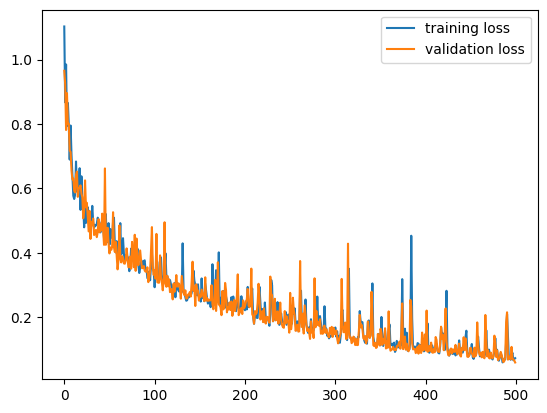

1/1 [==============================] - 0s 106ms/step


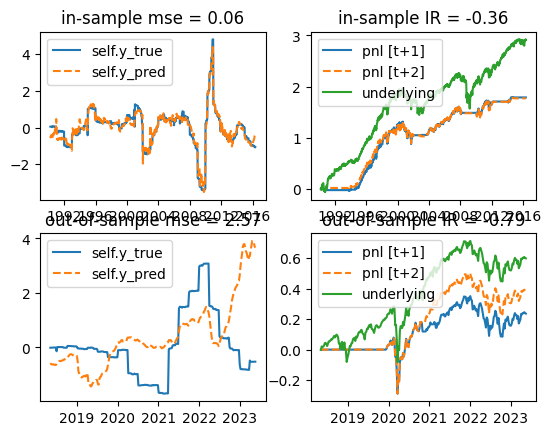

In [8]:

eval_train = window.make_dataset(train_df, batchsize=train_df.shape[0], shuffle=False)
eval_test = window.make_dataset(test_df, batchsize=test_df.shape[0], shuffle=False)
# Create an instance of the ModelPerformanceVisualizer class
visualizer = ModelPerformanceVisualizer(cnn_model, eval_train, eval_test, train_df, test_df, train_data, test_data, lb, lf)

# Plot loss history
visualizer.plot_loss(history)

# Plot in-sample performance
visualizer.plot_in_sample_performance()

# Plot in-sample trading strategy
visualizer.plot_in_sample_trading_strategy()

# Plot out-of-sample performance
visualizer.plot_out_of_sample_performance()

# Plot out-of-sample trading strategy
visualizer.plot_out_of_sample_trading_strategy()

# Display all plots
visualizer.show_plots()
